In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv('data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
model=models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=50, batch_size=200, validation_split=0.25) #각 epoch 마다 검증

Epoch 1/50
25/25 [==============================] - 1s 12ms/step - loss: 0.4214 - accuracy: 0.8438 - val_loss: 0.0852 - val_accuracy: 0.9889
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9076 - val_loss: 0.1493 - val_accuracy: 0.9668
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9177 - val_loss: 0.1756 - val_accuracy: 0.9415
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.9200 - val_loss: 0.1441 - val_accuracy: 0.9612
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9218 - val_loss: 0.1851 - val_accuracy: 0.9526
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9226 - val_loss: 0.1300 - val_accuracy: 0.9643
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9267 - val_loss: 0.1697 - val_accuracy: 0.9545
Epoch 8/50
25/25 [=

In [8]:
score=model.evaluate(X_test, y_test) #test
print('Test Accuracy: %.4f'%(score[1])) #accuracy

41/41 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9708
Test Accuracy: 0.9708


In [11]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split #모듈에서 가져온 함수
from tensorflow.keras.callbacks import ModelCheckpoint #tensorflow.keras.callbacks 안의 class= ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('data/wine.csv', header=None)
X=df.iloc[:, :-1]
y=df.iloc[:, -1]
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [13]:
model=models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
modelpath="model/" + "{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint=ModelCheckpoint(filepath=modelpath, verbose=1) #checkpoint(epoch 1회가 기본) 지정해줘서 이 때마다 파일 저장
h=model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.25,
            verbose=0, callbacks=[checkpoint])


Epoch 1: saving model to model\01-0.7508.hdf5

Epoch 2: saving model to model\02-0.8977.hdf5

Epoch 3: saving model to model\03-0.9100.hdf5

Epoch 4: saving model to model\04-0.9231.hdf5

Epoch 5: saving model to model\05-0.9285.hdf5

Epoch 6: saving model to model\06-0.9415.hdf5

Epoch 7: saving model to model\07-0.9400.hdf5

Epoch 8: saving model to model\08-0.9408.hdf5

Epoch 9: saving model to model\09-0.9462.hdf5

Epoch 10: saving model to model\10-0.9462.hdf5

Epoch 11: saving model to model\11-0.9338.hdf5

Epoch 12: saving model to model\12-0.9415.hdf5

Epoch 13: saving model to model\13-0.9477.hdf5

Epoch 14: saving model to model\14-0.9408.hdf5

Epoch 15: saving model to model\15-0.9485.hdf5

Epoch 16: saving model to model\16-0.9454.hdf5

Epoch 17: saving model to model\17-0.9500.hdf5

Epoch 18: saving model to model\18-0.9477.hdf5

Epoch 19: saving model to model\19-0.9508.hdf5

Epoch 20: saving model to model\20-0.9508.hdf5

Epoch 21: saving model to model\21-0.9577.hdf5



In [16]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('data/wine.csv', header=None)
X=df.iloc[:, :-1]
y=df.iloc[:, -1]
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model=models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h=model.fit(X_train, y_train, epochs=2000, batch_size=200, validation_split=0.25,
            verbose=0) #과대 적합 시각화

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [17]:
hist_df=pd.DataFrame(h.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.764206,0.665127,0.492986,0.800769
1,0.406094,0.839364,0.301962,0.884615
2,0.275007,0.887093,0.236220,0.907692
3,0.224217,0.921478,0.204276,0.930769
4,0.203336,0.930973,0.195769,0.930769


In [18]:
hist_df.info() #epoch별로 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          2000 non-null   float64
 1   accuracy      2000 non-null   float64
 2   val_loss      2000 non-null   float64
 3   val_accuracy  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB


In [19]:
print(type(h.history)) #history 객체: epoch 별로 학습시 발생하는 손실과 정확도

<class 'dict'>


In [21]:
print(h.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


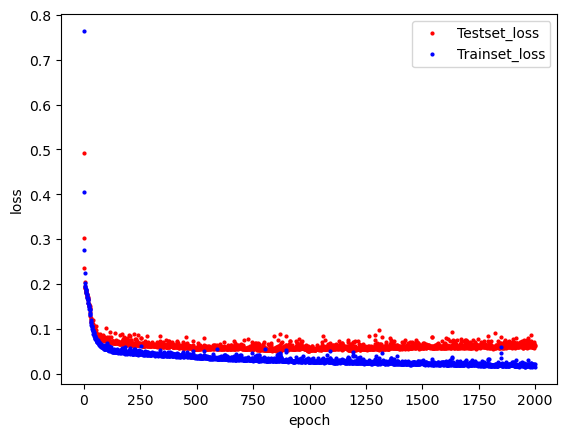

In [22]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "1"
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [27]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping #ModelCheckpoint, EarlyStopping class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('data/wine.csv', header=None)
X=df.iloc[:, :-1]
y=df.iloc[:, -1]
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model=models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20) #중간에 끊는 용도 (validation loss가 20번을 기다려도 안좋아지면)

modelpath="model/wine-best.hdf5"
checkpoint=ModelCheckpoint(filepath=modelpath, verbose=0, monitor='val_loss', save_best_only=True) #loss 가 적어질 때만 저장 #checkpoint 저장하는 용도
h=model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.25,
            verbose=1, callbacks=[checkpoint, early_stopping])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                390       
                                                                 
 dense_25 (Dense)            (None, 12)                372       
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 0.9526 - accuracy: 0.7493 - val_loss: 0.4613 - val_accuracy: 0.7915
Epoch 2/50
20/20 [=============================

In [28]:
score=model.evaluate(X_test, y_test) #test
print('Test Accuracy: %.4f'%(score[1])) #accuracy

41/41 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9677
Test Accuracy: 0.9677
